In [1]:
# import dependencies
import pandas as pd
from prophet import Prophet

## All Orders

In [2]:
# import Superstore (all orders)
super_df = pd.read_csv('../resources/superstore.csv')
super_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Region,Market,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Days to Ship,Returned,Profit Margin Percentage,Returned $ Amount
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,...,221.98,2,0.0,62.15,40.77,High,2,0.0,27.998018,0.0
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,...,3709.40,9,0.1,-288.77,923.63,Critical,2,0.0,-7.784817,0.0
2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,...,5175.17,9,0.1,919.97,915.49,Medium,1,0.0,17.776614,0.0
3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,Home Office,Berlin,Berlin,Germany,Western Europe,Europe,...,2892.51,5,0.1,-96.54,910.16,Medium,2,0.0,-3.337586,0.0
4,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,Consumer,Dakar,Dakar,Senegal,Western Africa,Africa,...,2832.96,8,0.0,311.52,903.04,Critical,1,0.0,10.996272,0.0


In [3]:
# Create a new df with only the order date & sales $ amount - then rename to ds and y, respectively
sales = super_df[['Order Date', 'Sales']]
sales = sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
sales.head()

,ds,y
0,2014-11-11,221.98
1,2014-02-05,3709.40
2,2014-10-17,5175.17
3,2014-01-28,2892.51
4,2014-11-05,2832.96


In [4]:
# initiate new Prophet object
m = Prophet()

In [5]:
#call Prophet fit method and pass in the sales df
m.fit(sales)

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
# extend our date range into the future by 365 days
# includes all current date and extends our data through end of 2016
future_sales = m.make_future_dataframe(periods=365)
future_sales.tail()

,ds
1790,2016-12-26
1791,2016-12-27
1792,2016-12-28
1793,2016-12-29
1794,2016-12-30


In [7]:
# create predicted sales values (yhat) as well as lower & upper values for uncertainty intervals
forecast_sales = m.predict(future_sales)
forecast_sales[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1790,2016-12-26,219.020049,-396.314906,871.026770
1791,2016-12-27,238.855751,-409.733253,890.798149
1792,2016-12-28,238.368659,-417.090363,851.544714
1793,2016-12-29,235.169693,-402.628808,874.457736
1794,2016-12-30,246.824777,-385.331810,843.944891


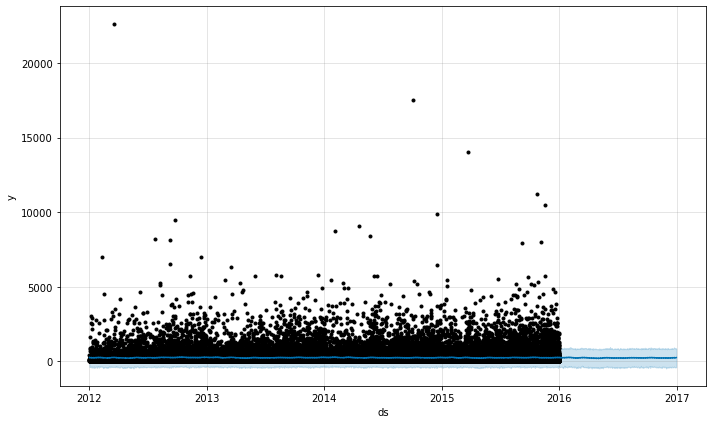

In [8]:
# plot the predicted sales values
pred_sales = m.plot(forecast_sales)

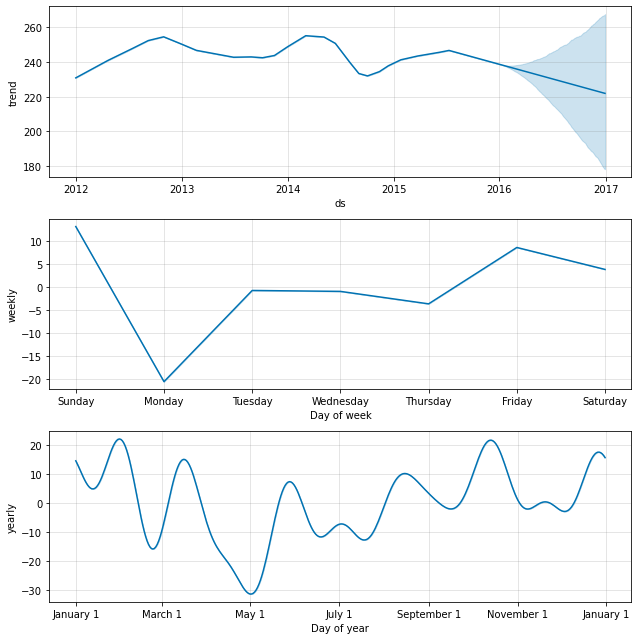

In [9]:
# plot the forecast components - overall trend, yearly seasonality, & weekly seasonality
pred_sales_components = m.plot_components(forecast_sales)

## Orders from Top Countries

In [11]:
# import superstore (top countries)
super_topcountries = pd.read_csv('../resources/superstore_topcountries.csv')
super_topcountries.head()

,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Region,Market,...,Quantity,Discount,Profit,Shipping Cost,Order Priority,Days to Ship,Returned,Profit Margin Percentage,Returned $ Amount,Orders per Country
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,...,2,0.0,62.15,40.77,High,2,0.0,27.998018,0.0,9994
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,...,9,0.1,-288.77,923.63,Critical,2,0.0,-7.784817,0.0,2837
2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,...,9,0.1,919.97,915.49,Medium,1,0.0,17.776614,0.0,2837
3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,Home Office,Berlin,Berlin,Germany,Western Europe,Europe,...,5,0.1,-96.54,910.16,Medium,2,0.0,-3.337586,0.0,2063
4,IN-2014-JM156557-41818,2014-06-28,2014-07-01,Second Class,Corporate,Sydney,New South Wales,Australia,Oceania,Asia Pacific,...,5,0.1,763.28,897.35,Critical,3,0.0,26.663127,0.0,2837


In [12]:
# Create a new df with only the order date & sales $ amount - then rename to ds and y, respectively
top_sales = super_topcountries[['Order Date', 'Sales']]
top_sales = top_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
top_sales.head()

,ds,y
0,2014-11-11,221.98
1,2014-02-05,3709.40
2,2014-10-17,5175.17
3,2014-01-28,2892.51
4,2014-06-28,2862.68


In [13]:
# initiate new Prophet object
m = Prophet()

In [14]:
#call Prophet fit method and pass in the top_sales df
m.fit(top_sales)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
# extend our date range into the future by 365 days
# includes all current date and extends our data through end of 2016
future_top_sales = m.make_future_dataframe(periods=365)
future_top_sales.tail()

,ds
1772,2016-12-26
1773,2016-12-27
1774,2016-12-28
1775,2016-12-29
1776,2016-12-30


In [16]:
# create predicted sales values (yhat) as well as lower & upper values for uncertainty intervals
forecast_top_sales = m.predict(future_top_sales)
forecast_top_sales[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1772,2016-12-26,222.386357,-468.949703,848.227616
1773,2016-12-27,232.460567,-419.722491,916.501789
1774,2016-12-28,237.074896,-433.620933,850.140790
1775,2016-12-29,227.735470,-426.484332,898.114246
1776,2016-12-30,240.668467,-417.632843,920.178926


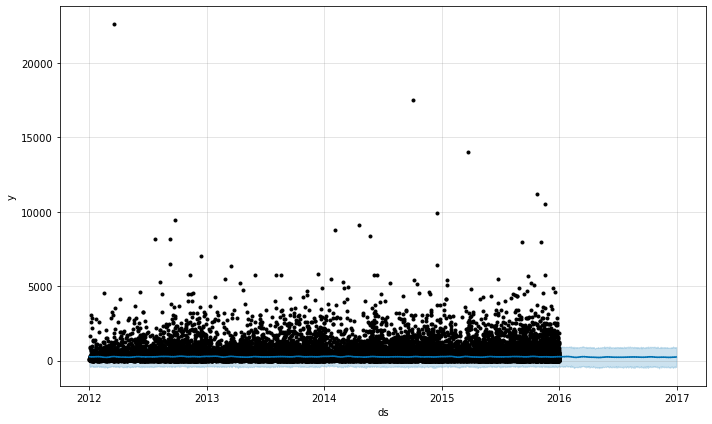

In [17]:
# plot the predicted sales values
pred_top_sales = m.plot(forecast_top_sales)

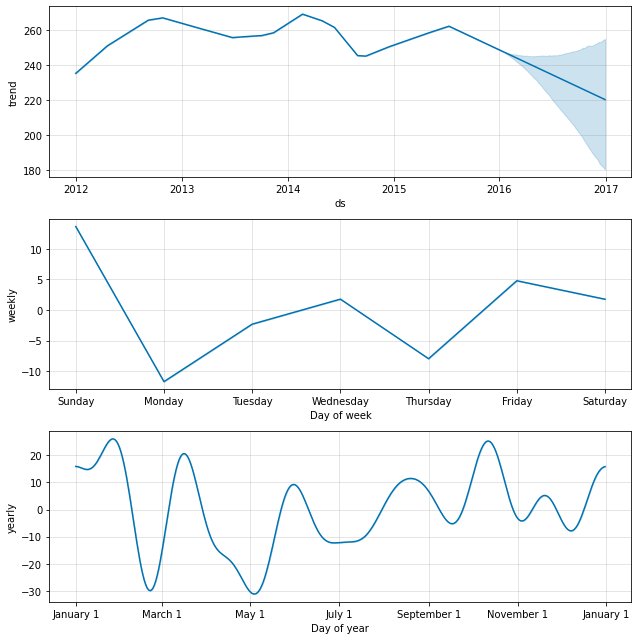

In [18]:
# plot the forecast components - overall trend, yearly seasonality, & weekly seasonality
pred_top_sales_components = m.plot_components(forecast_top_sales)